In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot         as plt
import mlem.mlem_reconstruct     as mr
import antea.image.fom_functions as fomf

#sys.stdout = open(os.devnull, "w") ## Prevents from printing

In [2]:
def read_images(path, tof, n_iter, save_every):
    rec = mr.MLEMReconstructor(libpath=path_to_mlem)
    x, y, z  = (60, 60, 60)
    if tof==0:
        x, y, z  = (180, 180, 180)
        tof = 20
    rec.prefix = f'{path}/rust_images/{x}_{y}_{z}_reco_1mm_no_jitter_tof_{tof}_'
    return np.array([rec.read_image(i) for i in range(0, n_iter, save_every)])

path_to_mlem = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
im_path      = '/Users/carmenromoluque/nexus_petit_analysis/full-body-phantom-paper/images_reco/photo_range1mm/'

tofs = [20, 60, 100, 110, 120, 130, 150, 140, 160, 170, 180, 190, 200]
#tofs = [0, 20, 100, 200]
tot_it     = 30
save_every = 2

the_images = {tof: read_images(im_path, tof, tot_it, save_every) 
              for tof in tofs}

Sensitivity matrix not specified: assuming a matrix of 1s.
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Sensitivity matrix not specified: assuming a matrix of 1s.
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Sensitivity matrix not specified: assuming a matrix of 1s.
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Sensitivity m

In [3]:
the_images

{20: array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           9.35932249e-02, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.0

In [4]:
def imshow_slice_integrated_along_z(ax, tof, it, z_slice):
    if it < 1:
        it = 1
    image_slice = the_images[tof][int(it/save_every-1),:,:,z_slice]
    im_integrated_along_z = np.sum(image_slice, axis=2).transpose()
    fig0 = ax.imshow(im_integrated_along_z, origin='lower')
    title = f'TOF = {tof} ps'
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('X (mm)', fontsize=13)
    ax.set_ylabel('Y (mm)', fontsize=13)
    #fig.colorbar(fig0, ax=ax, label='Events')

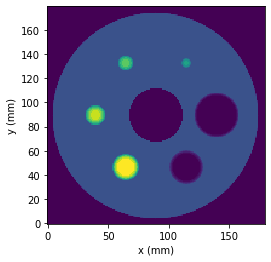

In [5]:
fig = plt.figure(1)

original_image = '/Users/carmenromoluque/Downloads/phantom_NEMAlike.npz'
d = np.load(original_image)
#print(d['phantom'].shape)
true_img = d['phantom']
plt.imshow(np.sum(true_img[:,:,81:99]/18,axis=2).transpose(),origin='lower')
#plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)');

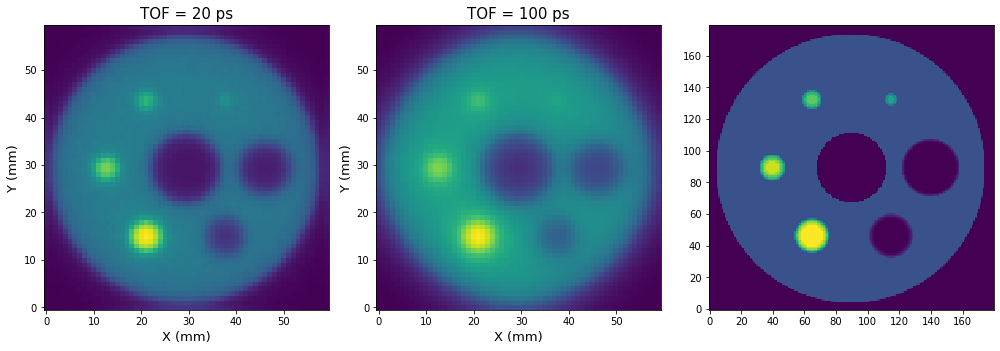

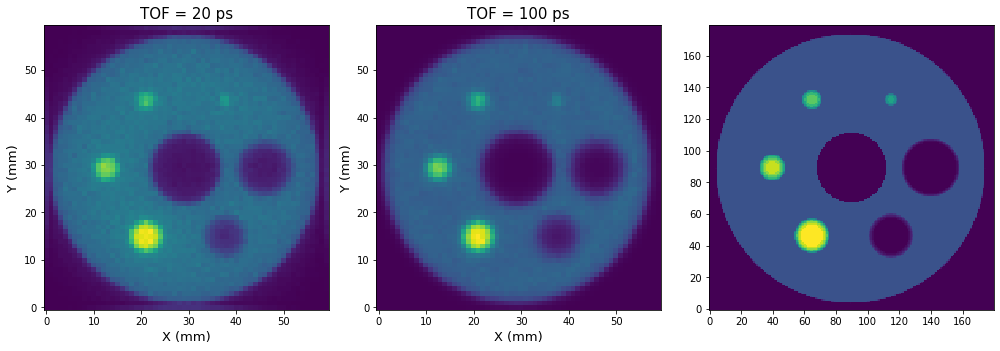

In [6]:
#it       = 16
z_slice  = slice(25,35)
for it in [0, 9]:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5))
    imshow_slice_integrated_along_z(ax1, tofs[0], it, z_slice)
    imshow_slice_integrated_along_z(ax2, tofs[2], it, z_slice)
    ax3.imshow(np.sum(true_img[:,:,81:99]/18,axis=2).transpose(),origin='lower')
    #for ax, tof in zip(axs.flatten(), tofs):
    #    imshow_slice_integrated_along_z(ax, tof, it, z_slice)
    plt.tight_layout()
    plt.show()

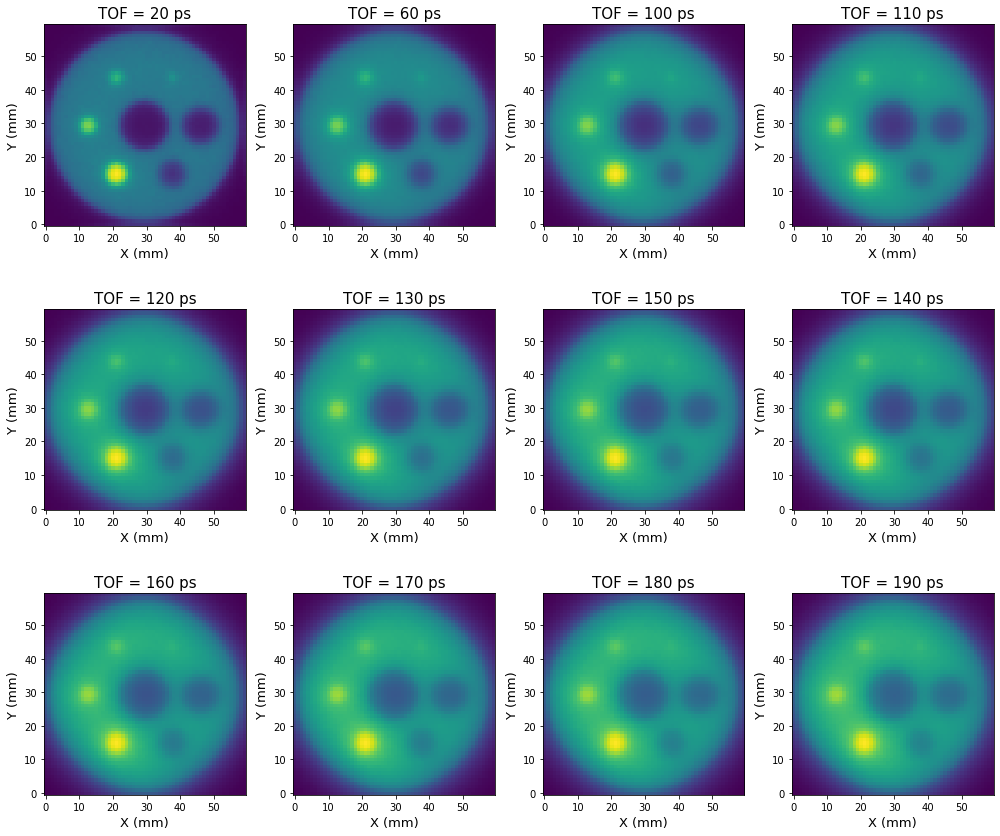

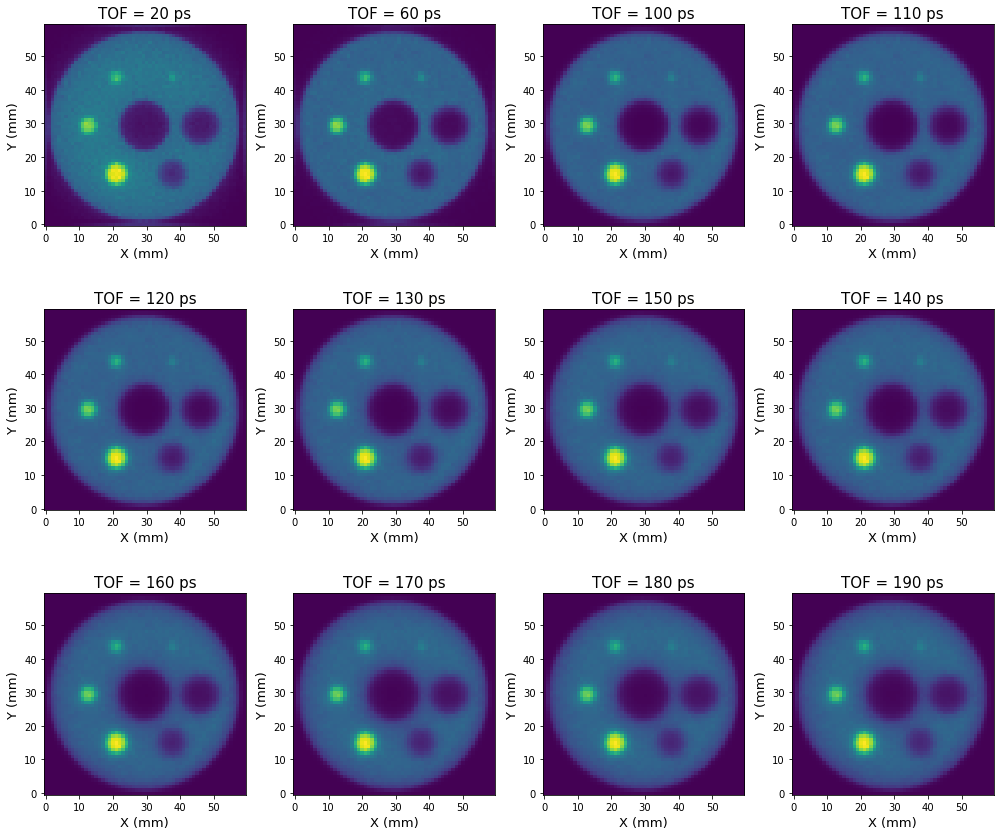

In [7]:
#it       = 16
z_slice  = slice(25,35)
for it in [0, 9]:
    fig, axs = plt.subplots(3,4, figsize=(14, 12))
    for ax, tof in zip(axs.flatten(), tofs):
        imshow_slice_integrated_along_z(ax, tof, it, z_slice)
    plt.tight_layout()
    plt.show()

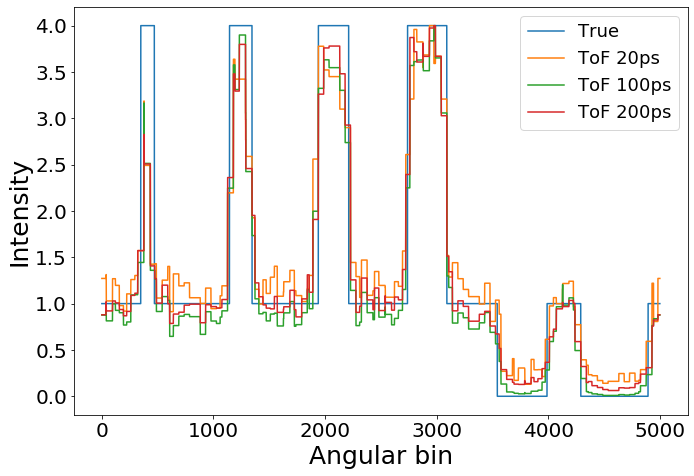

In [8]:
import antea.mcsim.phantom as ph

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=25)

fig = plt.figure(1)
fig.set_figwidth(11.)
fig.set_figheight(7.5)

prof_true = ph.circular_profile(true_img[:,:,89], 50, 5000, np.pi/6, 180, 180, 180, 180)
prof_20   = ph.circular_profile(the_images[20][5][:,:,29], 50, 5000, np.pi/6, 180, 180, 60, 60)
prof_100  = ph.circular_profile(the_images[100][5][:,:,29], 50, 5000, np.pi/6, 180, 180, 60, 60)
prof_200  = ph.circular_profile(the_images[200][5][:,:,29], 50, 5000, np.pi/6, 180, 180, 60, 60)


prof_20  = prof_20 /max(prof_20) *4
prof_100 = prof_100/max(prof_100)*4
prof_200 = prof_200/max(prof_200)*4

plt.plot(range(len(prof_true)), prof_true, label = 'True')
plt.plot(range(len(prof_20)), prof_20, label = 'ToF 20ps')
plt.plot(range(len(prof_100)), prof_100, label = 'ToF 100ps')
plt.plot(range(len(prof_200)), prof_200, label = 'ToF 200ps')

plt.xlabel("Angular bin")
plt.ylabel("Intensity");
plt.legend(loc=1, fontsize=18);

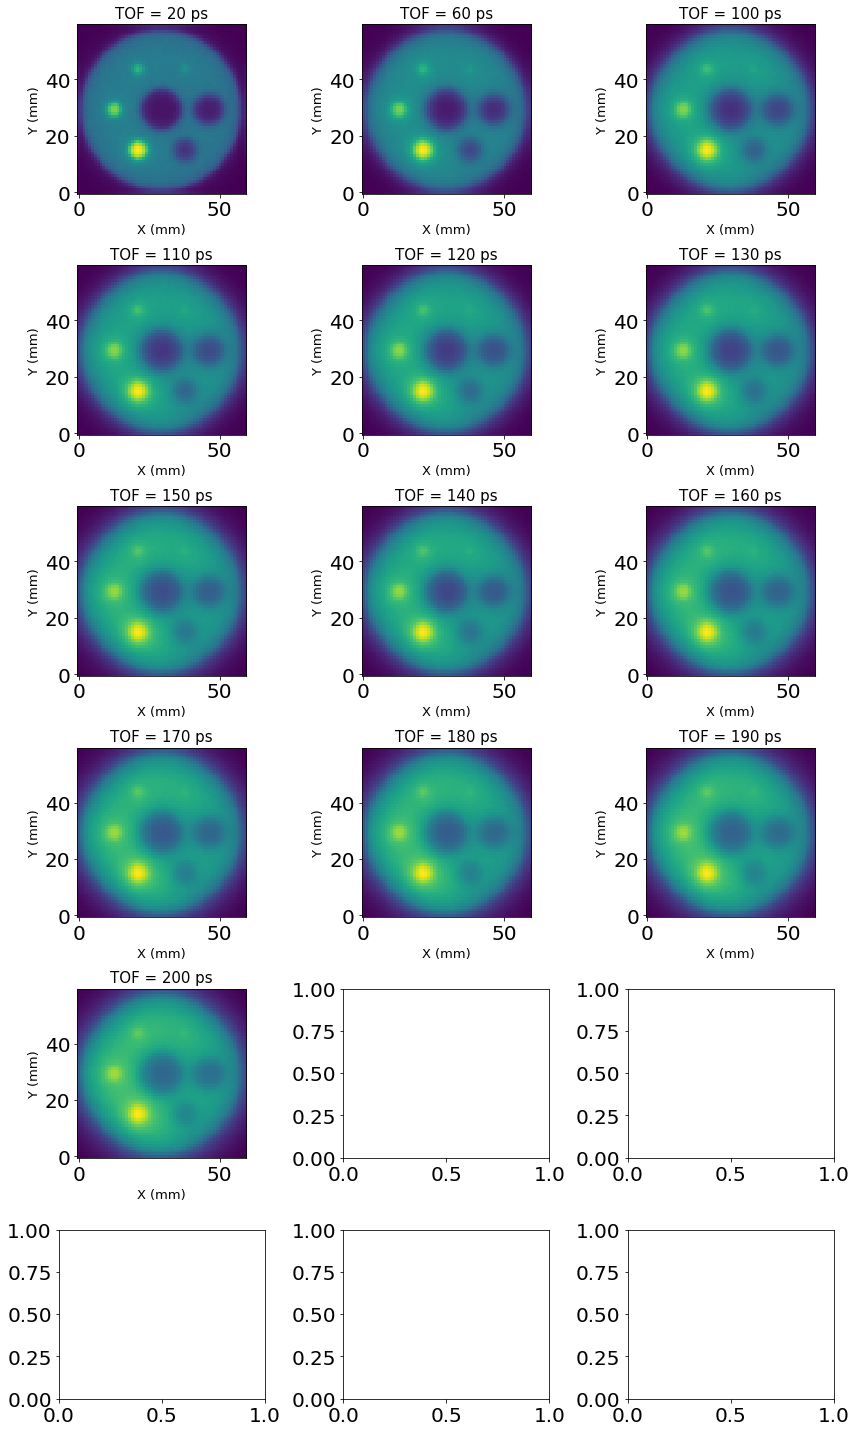

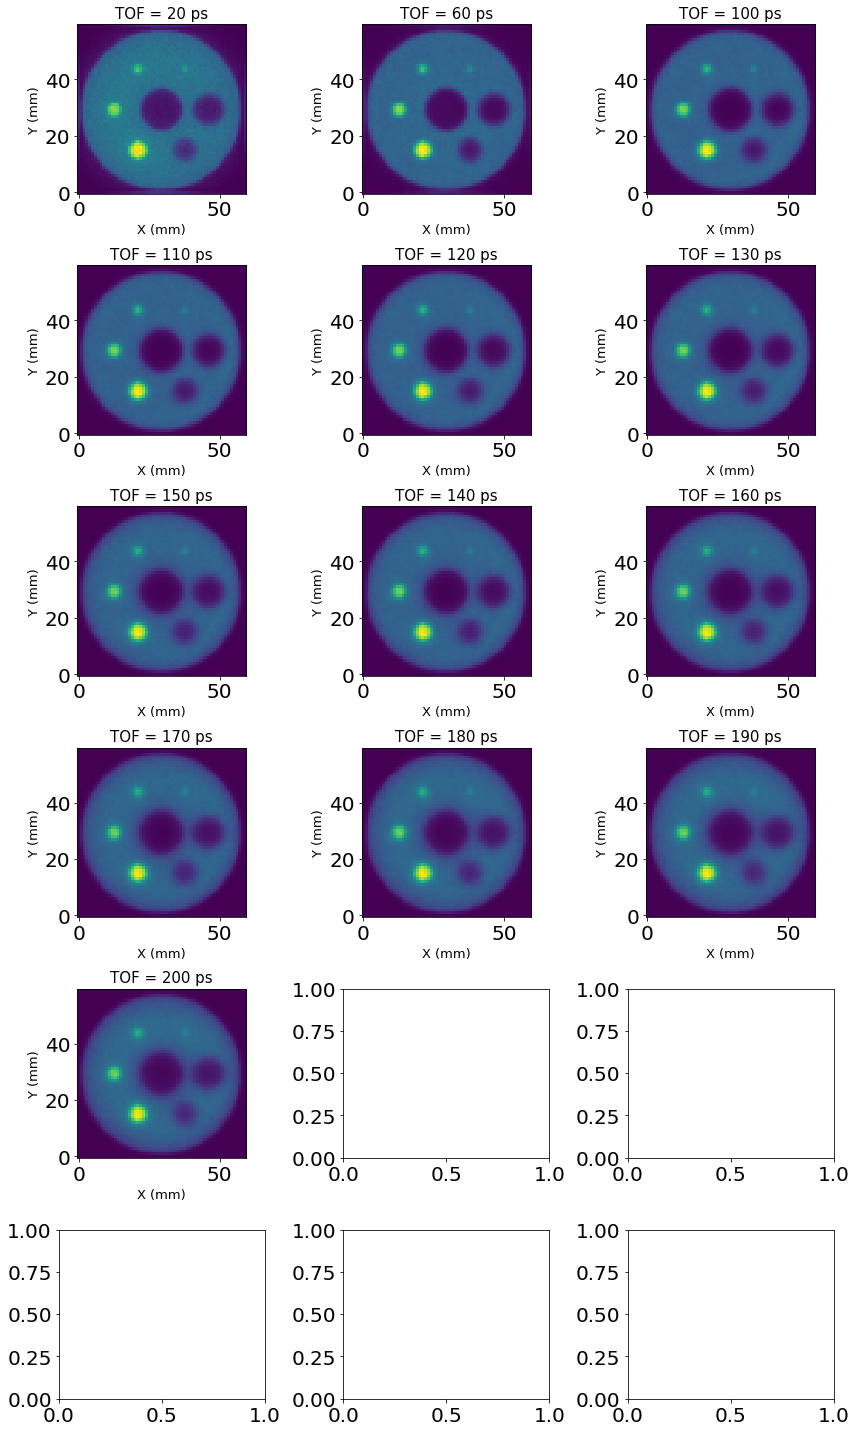

In [9]:
#it       = 16
z_slice  = slice(25,35)
for it in [0, 9]:
    fig, axs = plt.subplots(6,3, figsize=(12, 20))
    for ax, tof in zip(axs.flatten(), tofs):
        imshow_slice_integrated_along_z(ax, tof, it, z_slice)
        plt.tight_layout()
    plt.show()

In [10]:
sig_intensity  =  4
bckg_intensity =  1
radial_pos     = 50.
bckg_radius    =  4.
phi0           = np.pi/6
phi_step       = np.pi/3
n_phi          = 6

hot_radii   = [4., 6.5, 8.5, 11.]
cold_radii  = [14., 18.5]
all_radii   = hot_radii + cold_radii

hot_angles  = [np.pi/3, 2*np.pi/3, 3*np.pi/3, 4*np.pi/3]
cold_angles = [5*np.pi/3, 6*np.pi/3]

x_size = y_size = z_size = 180
x_bins = y_bins = z_bins =  60

radii  = hot_radii  + cold_radii
angles = hot_angles + cold_angles

In [11]:
num_hot     = 4
num_cold    = 2
num_spheres = num_hot + num_cold

from collections import namedtuple

sph_tof = namedtuple('sph_tof', 'sph, tof')
snr_err = namedtuple('snr_err', 'snrs, errs')

def get_snrs(images, tof, n_sph):
    calculate_snrs_and_errs = lambda images: fomf.snr3d(images, radii[n_sph], radial_pos, angles[n_sph], 
                                                        bckg_radius, phi0, phi_step, n_phi, 
                                                        x_size, y_size, z_size,
                                                        x_bins, y_bins, z_bins)
    all_images = tuple(map(calculate_snrs_and_errs, images[tof]))
    snrs = [r[0] for r in all_images]
    errs = [e[1] for e in all_images]
    print(tof, n_sph)
    return snr_err(snrs=snrs, errs=errs)

snrs = {sph_tof(sph=n_sph, tof=tof) :
        get_snrs(the_images, tof, n_sph)
        for tof in tofs
        for n_sph in range(num_spheres)}

20 0
20 1
20 2
20 3
20 4
20 5
60 0
60 1
60 2
60 3
60 4
60 5
100 0
100 1
100 2
100 3
100 4
100 5
110 0
110 1
110 2
110 3
110 4
110 5
120 0
120 1
120 2
120 3
120 4
120 5
130 0
130 1
130 2
130 3
130 4
130 5
150 0
150 1
150 2
150 3
150 4
150 5
140 0
140 1
140 2
140 3
140 4
140 5
160 0
160 1
160 2
160 3
160 4
160 5
170 0
170 1
170 2
170 3
170 4
170 5
180 0
180 1
180 2
180 3
180 4
180 5
190 0
190 1
190 2
190 3
190 4
190 5
200 0
200 1
200 2
200 3
200 4
200 5


In [12]:
from typing import Sequence
from typing import Dict

def plot_snr_sphs(snrs:    Dict[sph_tof, snr_err], 
                  spheres: Sequence[int],
                  tof:     int,
                  num_it:  int):
    images_wanted = int(num_it/save_every)
    for n_sphere in spheres:
        sphere = snrs  [sph_tof(sph=n_sphere, tof=tof)]
        plt.errorbar(x = list(range(0, num_it, save_every)),
                     y =    sphere.snrs[:images_wanted], 
                     yerr = sphere.errs[:images_wanted], 
                     xerr = None,
                     #color = color, 
                     marker = 's', 
                     capsize = 3,
                     label =f'sph{n_sphere}, TOF={tof}ps')

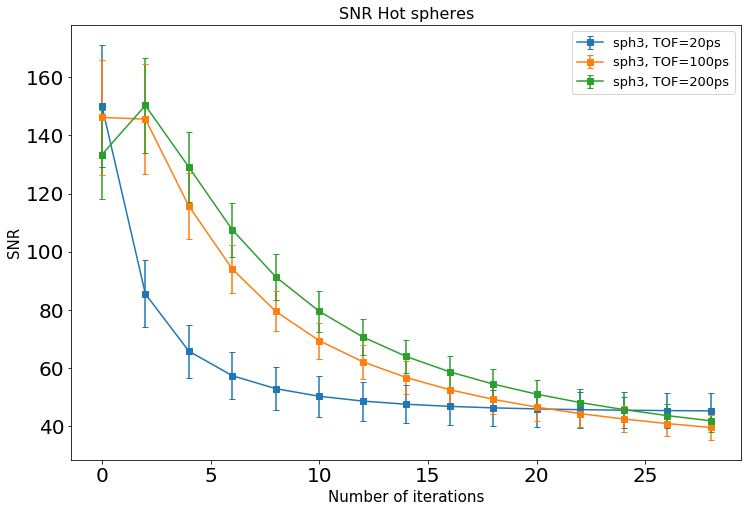

In [13]:
plt.figure(figsize=(12,8))
ts = [20, 100, 200]
for tof in ts:
#for tof in tofs:
    plot_snr_sphs(snrs, range(3,4), tof=tof, num_it=30)
plt.title(f'SNR Hot spheres', fontsize=16)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend(loc=1, fontsize=13, ncol=1);

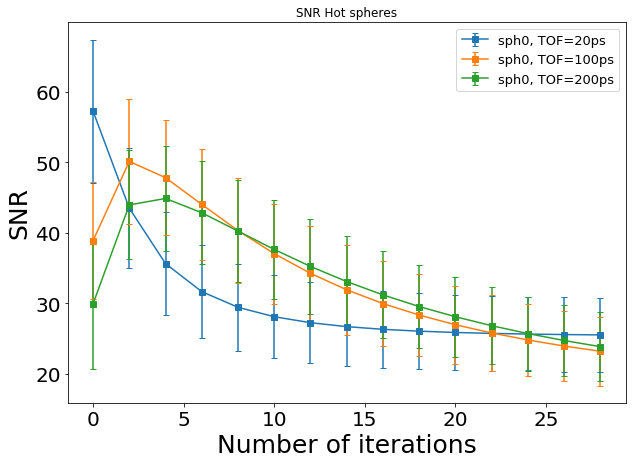

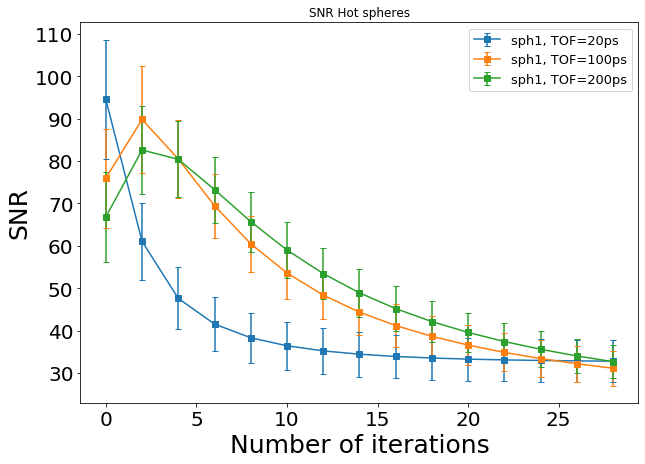

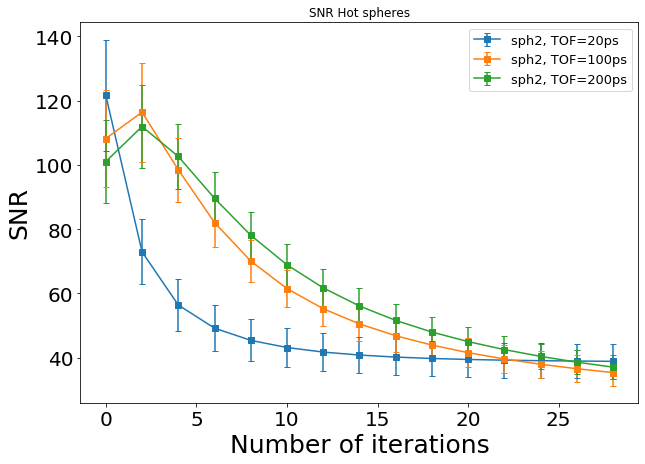

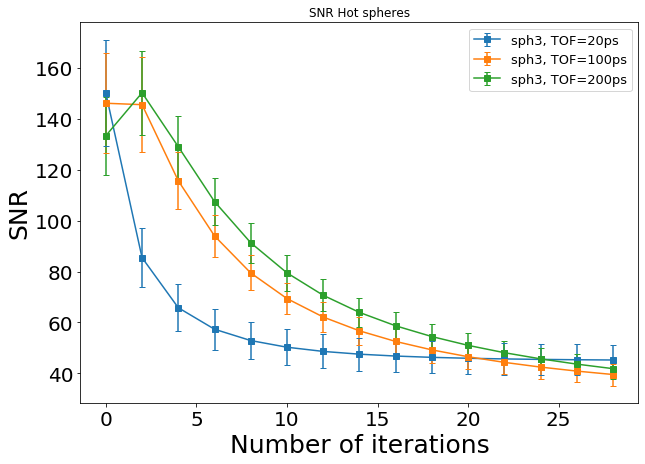

In [14]:
ts = [20, 100, 200]
for sph in range(4):
    plt.figure(figsize=(10,7))
    for tof in ts:
    #for tof in tofs:
        plot_snr_sphs(snrs, range(sph,sph+1), tof=tof, num_it=30)
    plt.title(f'SNR Hot spheres')
    plt.xlabel('Number of iterations')
    plt.ylabel('SNR')
    plt.legend(loc=1, fontsize=13, ncol=1)
    plt.show()

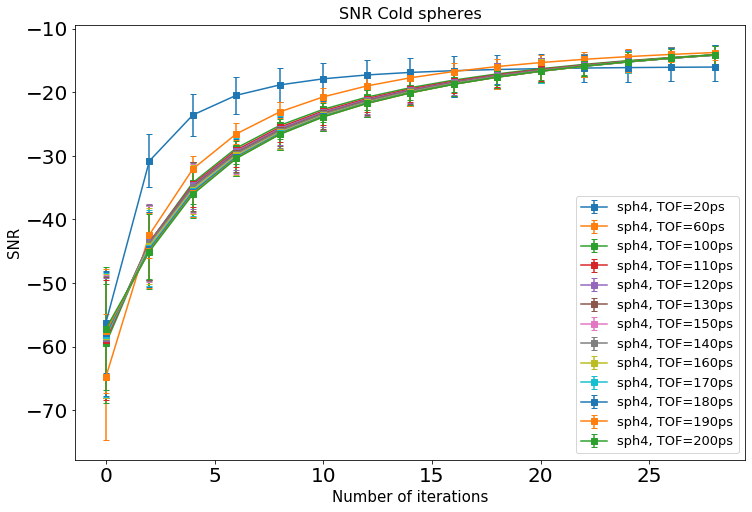

In [15]:
plt.figure(figsize=(12,8))
for tof in tofs:
    plot_snr_sphs(snrs, range(4,5), tof=tof, num_it=30)
plt.title(f'SNR Cold spheres', fontsize=16)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('SNR', fontsize=15)
plt.legend(loc=4, fontsize=13, ncol=1);

## CRC

In [16]:
crc_err = namedtuple('crc_err', 'crcs, errs')
sig_intensity  =  4
bckg_intensity =  1

def get_crcs(images, tof, n_sph):
    calculate_crcs_and_errs = lambda images: fomf.crc_hot3d(images, sig_intensity, bckg_intensity, 
                                                            radii[n_sph], radial_pos, angles[n_sph], 
                                                            bckg_radius, phi0, phi_step, n_phi, 
                                                            x_size, y_size, z_size,
                                                            x_bins, y_bins, z_bins)
    all_images = tuple(map(calculate_crcs_and_errs, images[tof]))
    crcs = [r[0]*100 for r in all_images]
    errs = [e[1]*100 for e in all_images]
    print(tof, n_sph)
    return crc_err(crcs=crcs, errs=errs)

crcs = {sph_tof(sph=n_sph, tof=tof):
        get_crcs(the_images, tof, n_sph)
        for tof in tofs
        for n_sph in range(4)}

20 0
20 1
20 2
20 3
60 0
60 1
60 2
60 3
100 0
100 1
100 2
100 3
110 0
110 1
110 2
110 3
120 0
120 1
120 2
120 3
130 0
130 1
130 2
130 3
150 0
150 1
150 2
150 3
140 0
140 1
140 2
140 3
160 0
160 1
160 2
160 3
170 0
170 1
170 2
170 3
180 0
180 1
180 2
180 3
190 0
190 1
190 2
190 3
200 0
200 1
200 2
200 3


In [17]:
def get_crcs_cold(images, tof, n_sph):
    calculate_crcs_and_errs = lambda images: fomf.crc_cold3d(images, radii[n_sph], radial_pos, angles[n_sph], 
                                                             bckg_radius, phi0, phi_step, n_phi, 
                                                             x_size, y_size, z_size,
                                                             x_bins, y_bins, z_bins)
    all_images = tuple(map(calculate_crcs_and_errs, images[tof]))
    crcs = [r[0]*100 for r in all_images]
    errs = [e[1]*100 for e in all_images]
    print(tof, n_sph)
    return crc_err(crcs=crcs, errs=errs)

crcs_cold = {sph_tof(sph=n_sph, tof=tof):
             get_crcs(the_images, tof, n_sph)
             for tof in tofs
             for n_sph in range(4, 6)}

20 4
20 5
60 4
60 5
100 4
100 5
110 4
110 5
120 4
120 5
130 4
130 5
150 4
150 5
140 4
140 5
160 4
160 5
170 4
170 5
180 4
180 5
190 4
190 5
200 4
200 5


In [18]:
def plot_crc_sphs(crcs:    Dict[sph_tof, crc_err], 
                  spheres: Sequence[int], 
                  tof:     int,
                  num_it:  int):
    images_wanted = int(num_it/save_every)
    for n_sphere in spheres:
        sphere = crcs[sph_tof(sph=n_sphere, tof=tof)]
        plt.errorbar(x = list(range(0, num_it, save_every)),
                     y =    sphere.crcs[:images_wanted], 
                     yerr = sphere.errs[:images_wanted], 
                     xerr = None,
                     marker = 's', 
                     capsize = 3,
                     label =f'sph{n_sphere}, TOF={tof}ps')

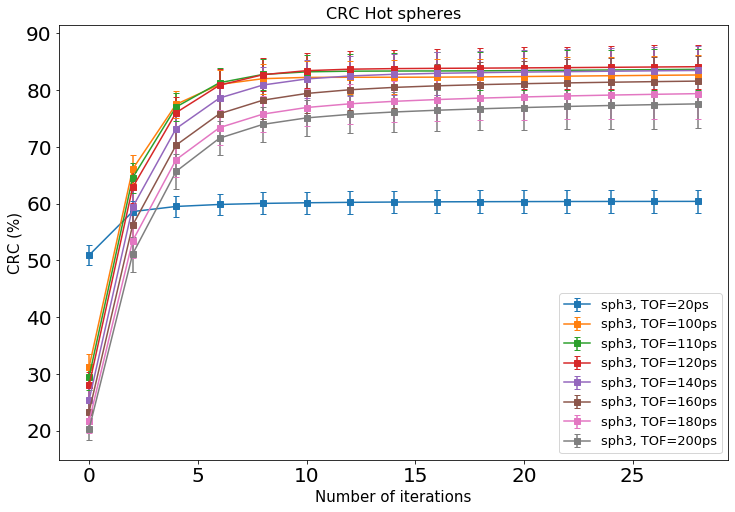

In [19]:
plt.figure(figsize=(12,8))
ts = [20, 100, 110, 120, 140, 160, 180, 200]
#for tof in tofs[:]:
for tof in ts:
    plot_crc_sphs(crcs, range(3,4), tof=tof, num_it=30)
plt.title(f'CRC Hot spheres', fontsize=16)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('CRC (%)', fontsize=15)
plt.legend(loc=4, fontsize=13, ncol=1);

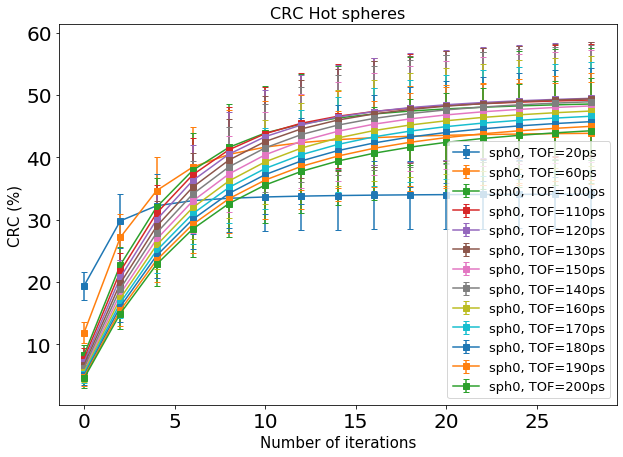

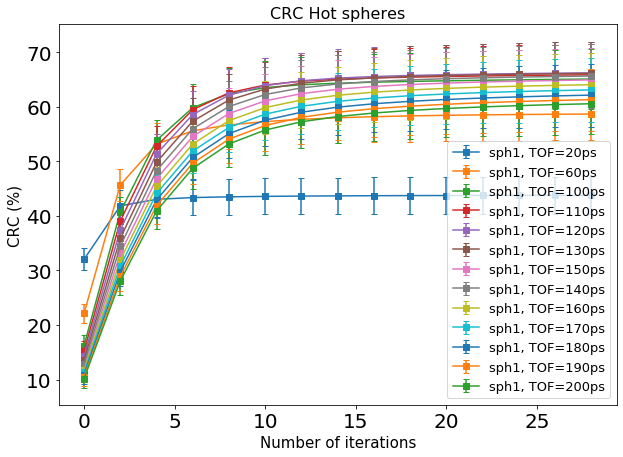

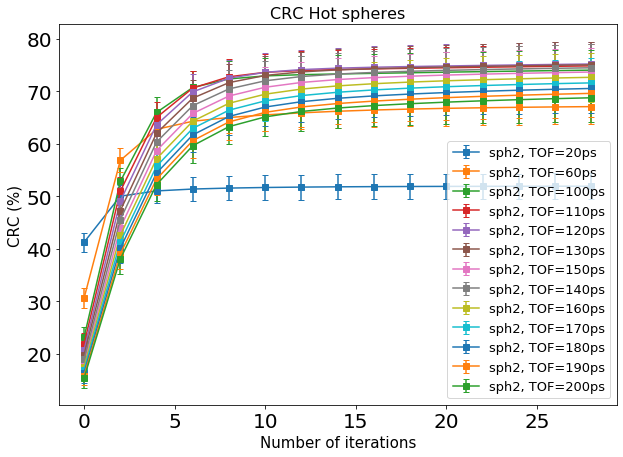

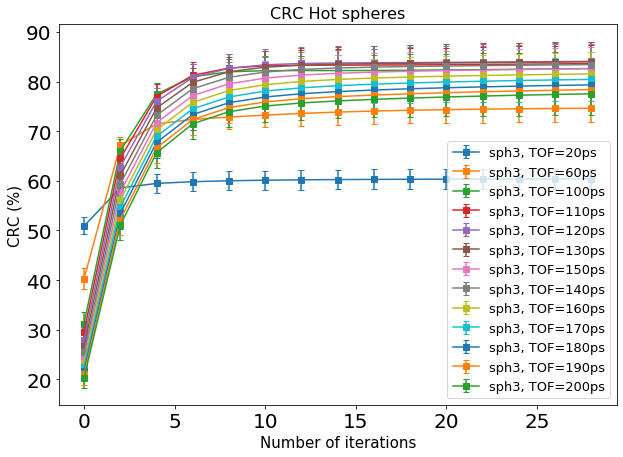

In [20]:
for sph in range(4):
    plt.figure(figsize=(10,7))
    for tof in tofs:
        plot_crc_sphs(crcs, range(sph, sph+1), tof=tof, num_it=30)
    plt.title(f'CRC Hot spheres', fontsize=16)
    plt.xlabel('Number of iterations', fontsize=15)
    plt.ylabel('CRC (%)', fontsize=15)
    plt.legend(loc=4, fontsize=13, ncol=1)
    plt.show()

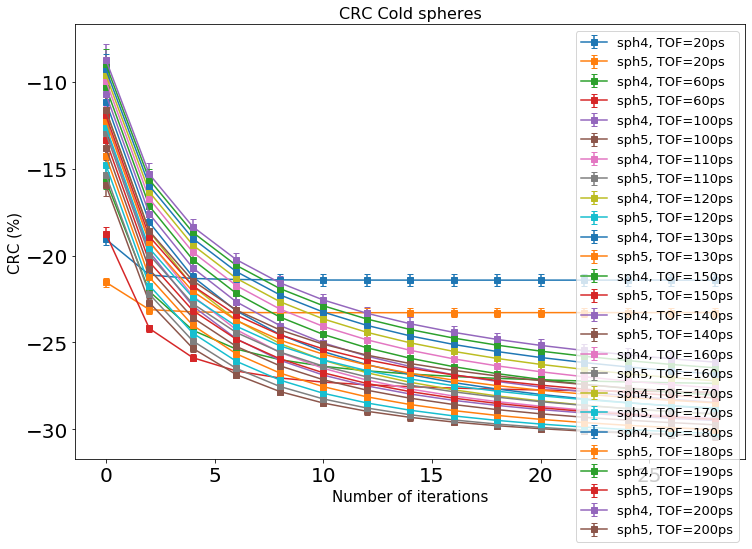

In [21]:
plt.figure(figsize=(12,8))
for tof in tofs:
    plot_crc_sphs(crcs_cold, range(4,6), tof=tof, num_it=30)
plt.title(f'CRC Cold spheres', fontsize=16)
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('CRC (%)', fontsize=15)
plt.legend(loc=1, fontsize=13, ncol=1);

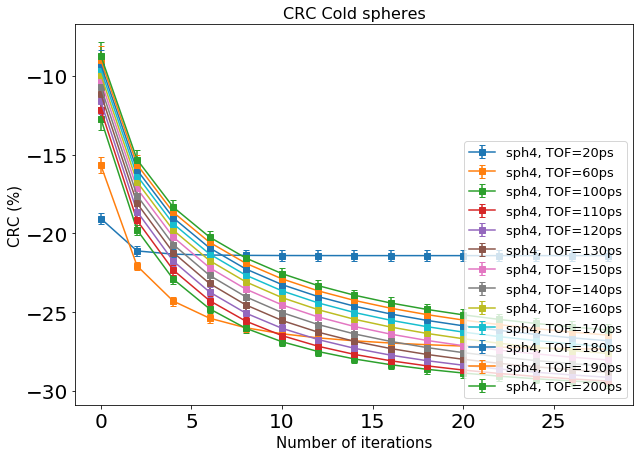

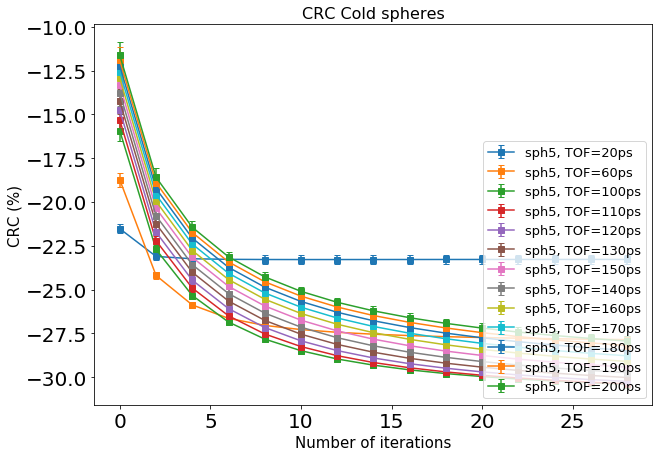

In [22]:
for sph in range(4, 6):
    plt.figure(figsize=(10,7))
    for tof in tofs:
        plot_crc_sphs(crcs_cold, range(sph, sph+1), tof=tof, num_it=30)
    plt.title(f'CRC Cold spheres', fontsize=16)
    plt.xlabel('Number of iterations', fontsize=15)
    plt.ylabel('CRC (%)', fontsize=15)
    plt.legend(loc=4, fontsize=13, ncol=1)
    plt.show()

In [30]:
def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

file = '/Users/carmenromoluque/Desktop/180_180_180_reco_1mm_no_jitter_tof_20.crcs'

all_crcs = []
with open(file, 'r') as df:
    lines  = df.read().split('\n')
    for line in lines:
        if line == '':
            continue
        print(line)
        crcs = [num(x) for x in line.split('  ')]
        all_crcs.append(crcs)

   0.87   2.84   5.04   7.28  10.84  18.18


ValueError: could not convert string to float: 